<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/DataStructuresAndAlgorithms%20/Lecture%2004%20-%20Trees/Lecture_04_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 04 - Árvores
  

  



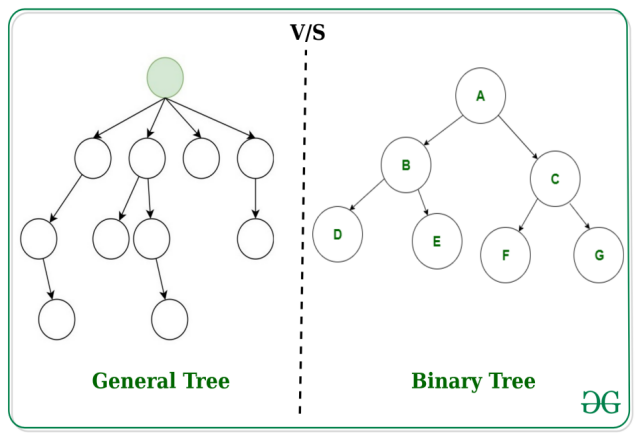



---



## Implementação
A seguir vamos implementar a classe Node de uma árvore

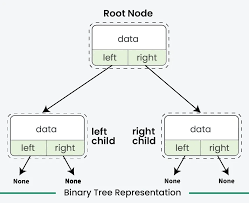

In [17]:
class Node:
    #  <-[data]->
    def __init__(self,data):
        self.data = data
        self.left = None
        self.right = None

Agora, vamos implementar a inserção (push) em Àrvores

Define-se que :

- Dados inferiores ao nodo são inseridos a esquerda

- Dados superiores ao nodo são inseridos a direita

In [18]:
class Node:
    #  <-[data]->
    def __init__(self,data):
        self.data = data
        self.left = None
        self.right = None

class binary_tree:
    # Init Class
    def __init__(self,data):
        self.root = Node(data)

    def push(self,data):

        #teste sanidade :)
        if self.root is None:
            self.root = binary_tree(data)

        if data < self.root.data:
            if self.root.left is None:
              self.root.left = binary_tree(data)
            else:
                self.root.left.push(data)
        else:
            if self.root.right is None:
                self.root.right = binary_tree(data)
            else:
                self.root.right.push(data)

    def walk_pre_order(self):

        print(self.root.data)

        if self.root.left is not None:
            self.root.left.walk_pre_order()

        if self.root.right is not None:
            self.root.right.walk_pre_order()

    #def walk_in_order(self):
      #implement it here

    #def walk_post_order(self):
      #implement it here

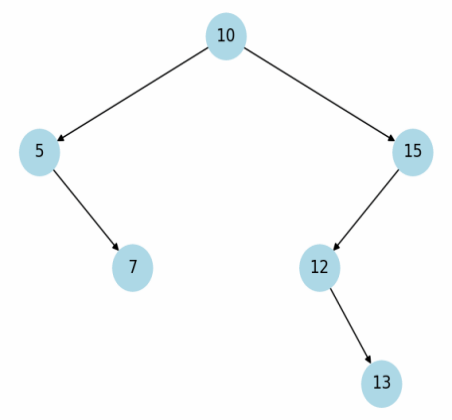

In [19]:
tree = binary_tree(10)
tree.push(5)
tree.push(15)
tree.push(7)
tree.push(12)
tree.push(13)

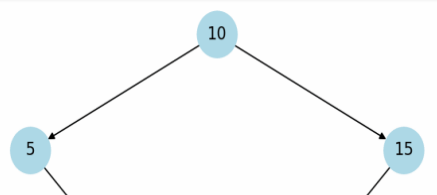

Acessando "manualmente" os elementos

In [20]:
node = tree.root #raiz
print(node.data)

node = tree.root.left.root #raiz->left
print(node.data)

node = tree.root.right.root #raiz->right
print(node.data)

10
5
15


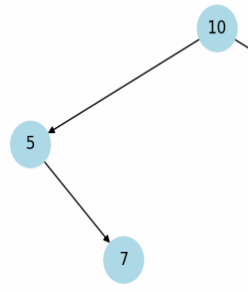

In [21]:
#Caminhando "manualmente" na arvore ()
print(tree.root.data) #raiz
print(tree.root.left.root.data) #raiz->left
print(tree.root.left.root.left) #raiz->left->left
print(tree.root.left.root.right.root.data) #raiz->left->dir


10
5
None
7




---



##Caminhamento em Árvores
  * InOrder
  * PreOrder
  * PostOrder

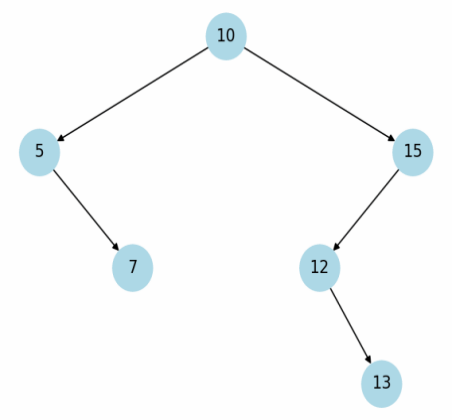

In [22]:
#pre order: visita, esq, dir
tree.walk_pre_order()

10
5
7
15
12
13


In [23]:
#Codifique
#tree.walk_inorder()

In [24]:
#Codifique
#tree.walk_postorder()



---



#AVL Tree
* Árvores Binárias Balancedeadas (AVL - Adelson-Velsky and Landis)

* Rotações para Balancear

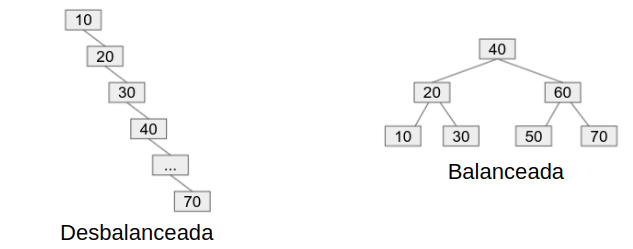

In [27]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None   # subárvore esquerda (AVLTree)
        self.right = None  # subárvore direita (AVLTree)
        self.height = 1    # altura inicial

class AVLTree:
    def __init__(self, data):
        self.root = Node(data)

    def push(self, data):
        self.root = self._insert(self.root, data)

    def _insert(self, node, data):
        if node is None:
            return Node(data)

        if data < node.data:
            if node.left is None:
                node.left = AVLTree(data)
            else:
                node.left.root = self._insert(node.left.root, data)
        else:
            if node.right is None:
                node.right = AVLTree(data)
            else:
                node.right.root = self._insert(node.right.root, data)

        # Atualiza altura
        left_height = node.left.root.height if node.left else 0
        right_height = node.right.root.height if node.right else 0
        node.height = 1 + max(left_height, right_height)


        balance = left_height - right_height

        # Rotação Left-Left
        if balance > 1 and data < node.left.root.data:
            return self._right_rotate(node)

        # Rotação Right-Right
        if balance < -1 and data > node.right.root.data:
            return self._left_rotate(node)

        # Rotação Left-Right
        if balance > 1 and data > node.left.root.data:
            node.left.root = self._left_rotate(node.left.root)
            return self._right_rotate(node)

        # Rotação Right-Left
        if balance < -1 and data < node.right.root.data:
            node.right.root = self._right_rotate(node.right.root)
            return self._left_rotate(node)

        return node

    # Rotação à esquerda
    def _left_rotate(self, z):
        y = z.right.root
        T2 = y.left

        y.left = AVLTree(z.data)
        y.left.root.left = z.left
        y.left.root.right = T2

        # Atualiza alturas
        z_left_height = z.left.root.height if z.left else 0
        z_right_height = T2.root.height if T2 else 0
        y.left.root.height = 1 + max(z_left_height, z_right_height)

        y.height = 1 + max(y.left.root.height if y.left else 0,
                           y.right.root.height if y.right else 0)
        return y

    # Rotação à direita
    def _right_rotate(self, z):
        y = z.left.root
        T3 = y.right

        y.right = AVLTree(z.data)
        y.right.root.left = T3
        y.right.root.right = z.right

        # Atualiza alturas
        z_left_height = T3.root.height if T3 else 0
        z_right_height = z.right.root.height if z.right else 0
        y.right.root.height = 1 + max(z_left_height, z_right_height)

        y.height = 1 + max(y.left.root.height if y.left else 0,
                           y.right.root.height if y.right else 0)
        return y

    # ====== Percursos ======
    def walk_preorder(self):
        print(self.root.data)
        if self.root.left:
            self.root.left.walk_preorder()
        if self.root.right:
            self.root.right.walk_preorder()

    def walk_inorder(self):
        if self.root.left:
            self.root.left.walk_inorder()
        print(self.root.data)
        if self.root.right:
            self.root.right.walk_inorder()

    def walk_postorder(self):
        if self.root.left:
            self.root.left.walk_postorder()
        if self.root.right:
            self.root.right.walk_postorder()
        print(self.root.data)

In [28]:
tree_root = AVLTree(10)
tree_root.push(15)
tree_root.push(5)
tree_root.push(12)
tree_root.push(17)
tree_root.push(8)
tree_root.push(4)

print('#### Pre-Order ####')
tree_root.walk_preorder()

print('#### In-Order ####')
tree_root.walk_inorder()

print('#### Post-Order ####')
tree_root.walk_postorder()

#### Pre-Order ####
10
5
4
8
15
12
17
#### In-Order ####
4
5
8
10
12
15
17
#### Post-Order ####
4
8
5
12
17
15
10
